In [7]:
import warnings
warnings.filterwarnings('ignore')

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import missingno as msno

In [10]:
weather = pd.read_csv('IndianWeatherRepository.csv')
weather.head(5)

,country,location_name,region,latitude,longitude,timezone,last_updated_epoch,last_updated,temperature_celsius,temperature_fahrenheit,...,air_quality_PM2.5,air_quality_PM10,air_quality_us-epa-index,air_quality_gb-defra-index,sunrise,sunset,moonrise,moonset,moon_phase,moon_illumination
0,India,Ashoknagar,Madhya Pradesh,24.57,77.72,Asia/Kolkata,1693286100,2023-08-29 10:45,27.5,81.5,...,12.6,18.5,1,2,05:59 AM,06:41 PM,05:42 PM,03:38 AM,Waxing Gibbous,93
1,India,Raisen,Madhya Pradesh,23.33,77.80,Asia/Kolkata,1693286100,2023-08-29 10:45,27.5,81.5,...,10.7,14.2,1,1,06:00 AM,06:40 PM,05:39 PM,03:41 AM,Waxing Gibbous,93
2,India,Chhindwara,Madhya Pradesh,22.07,78.93,Asia/Kolkata,1693286100,2023-08-29 10:45,26.3,79.3,...,16.8,20.7,2,2,05:56 AM,06:34 PM,05:32 PM,03:39 AM,Waxing Gibbous,93
3,India,Betul,Madhya Pradesh,21.86,77.93,Asia/Kolkata,1693286100,2023-08-29 10:45,25.6,78.1,...,4.9,6.6,1,1,06:00 AM,06:38 PM,05:36 PM,03:43 AM,Waxing Gibbous,93
4,India,Hoshangabad,Madhya Pradesh,22.75,77.72,Asia/Kolkata,1693286100,2023-08-29 10:45,27.2,81.0,...,11.4,14.8,1,1,06:01 AM,06:39 PM,05:38 PM,03:42 AM,Waxing Gibbous,93


In [11]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33369 entries, 0 to 33368
Data columns (total 42 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   country                       33369 non-null  object 
 1   location_name                 33369 non-null  object 
 2   region                        33369 non-null  object 
 3   latitude                      33369 non-null  float64
 4   longitude                     33369 non-null  float64
 5   timezone                      33369 non-null  object 
 6   last_updated_epoch            33369 non-null  int64  
 7   last_updated                  33369 non-null  object 
 8   temperature_celsius           33369 non-null  float64
 9   temperature_fahrenheit        33369 non-null  float64
 10  condition_text                33369 non-null  object 
 11  wind_mph                      33369 non-null  float64
 12  wind_kph                      33369 non-null  float64
 13  w

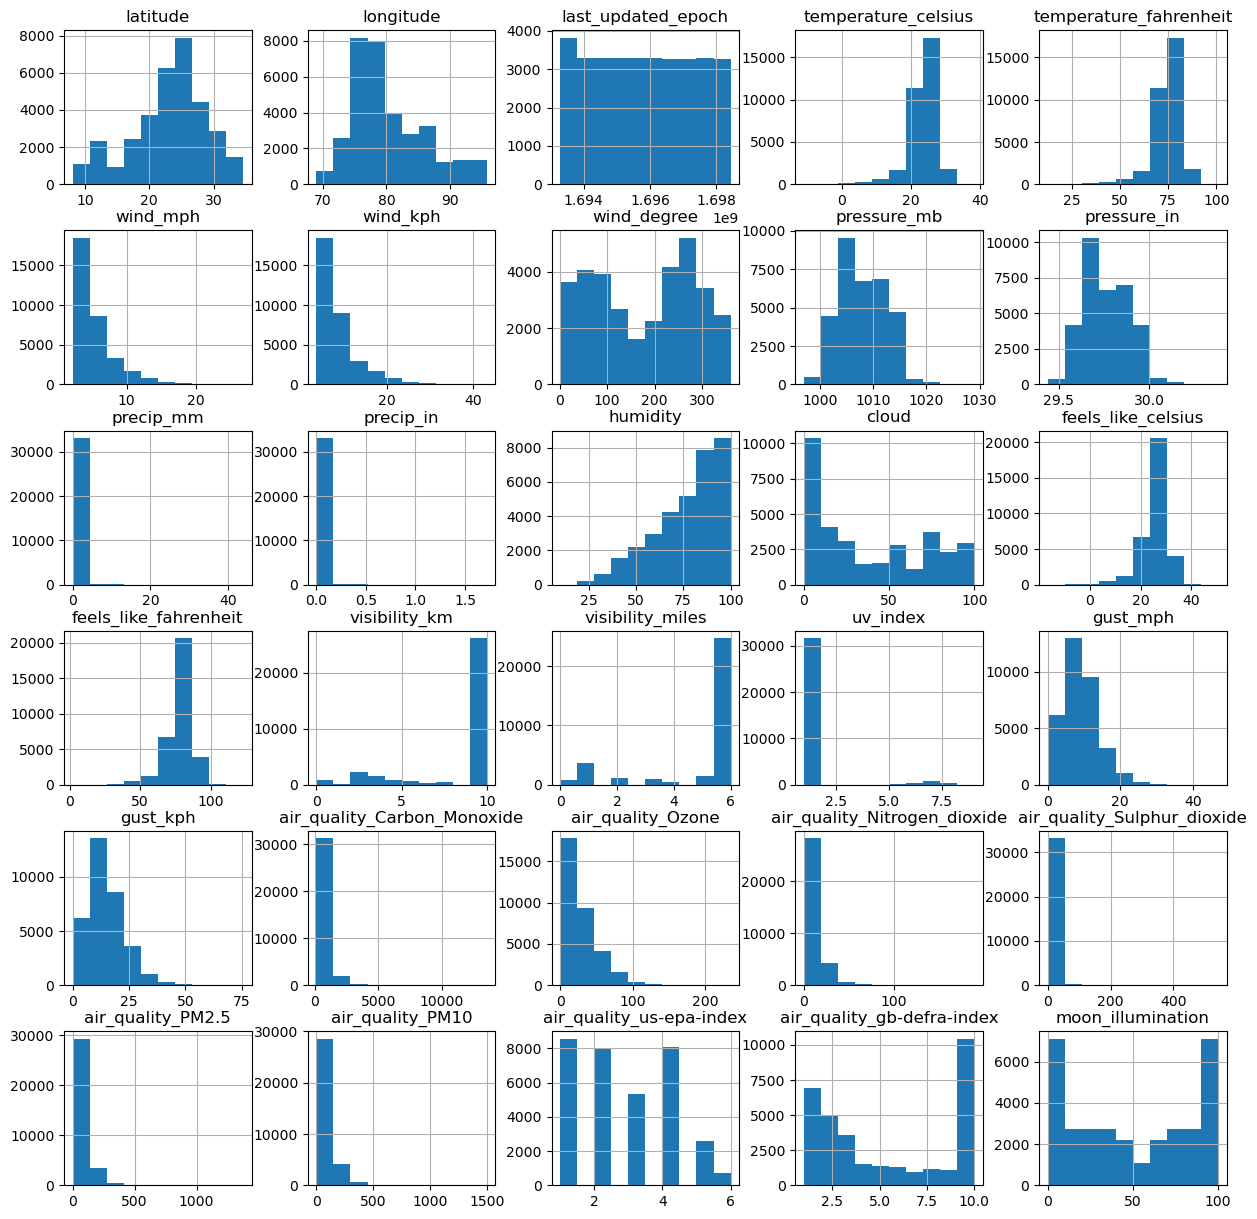

In [12]:
weather.hist(figsize=(15,15), xrot=0);

In [13]:
weather.describe()

,latitude,longitude,last_updated_epoch,temperature_celsius,temperature_fahrenheit,wind_mph,wind_kph,wind_degree,pressure_mb,pressure_in,...,gust_kph,air_quality_Carbon_Monoxide,air_quality_Ozone,air_quality_Nitrogen_dioxide,air_quality_Sulphur_dioxide,air_quality_PM2.5,air_quality_PM10,air_quality_us-epa-index,air_quality_gb-defra-index,moon_illumination
count,33369.000000,33369.000000,3.336900e+04,33369.000000,33369.000000,33369.000000,33369.000000,33369.000000,33369.000000,33369.000000,...,33369.000000,33369.000000,33369.000000,33369.000000,33369.000000,33369.000000,33369.000000,33369.000000,33369.000000,33369.000000
mean,23.098252,80.237404,1.695854e+09,23.512266,74.322110,5.064923,8.156981,178.473224,1007.908808,29.763050,...,14.522791,663.371608,27.297956,10.726039,4.756418,63.063601,77.114001,2.710570,5.360544,48.963889
std,5.796375,5.757373,1.515616e+06,4.297052,7.734161,3.033519,4.874238,106.529451,4.218568,0.124426,...,7.985239,583.965511,23.781891,10.983117,10.992155,70.459339,83.414971,1.392804,3.717024,35.676698
min,8.080000,68.970000,1.693286e+09,-10.900000,12.400000,2.200000,3.600000,1.000000,997.000000,29.440000,...,0.000000,113.500000,0.000000,0.000000,0.000000,0.500000,0.700000,1.000000,1.000000,0.000000
25%,20.270000,76.070000,1.694559e+09,21.900000,71.500000,2.700000,4.300000,78.000000,1005.000000,29.670000,...,8.600000,320.400000,9.100000,3.700000,1.000000,14.800000,19.500000,1.000000,2.000000,14.000000
50%,23.970000,78.690000,1.695852e+09,24.000000,75.300000,4.300000,6.800000,197.000000,1007.000000,29.750000,...,13.600000,507.400000,21.800000,7.500000,2.300000,40.600000,52.200000,3.000000,4.000000,48.000000
75%,26.770000,83.900000,1.697145e+09,26.000000,78.800000,6.300000,10.100000,270.000000,1011.000000,29.860000,...,18.900000,807.800000,39.300000,13.900000,4.800000,86.900000,106.200000,4.000000,10.000000,84.000000
max,34.570000,95.800000,1.698439e+09,38.300000,100.900000,26.800000,43.200000,360.000000,1029.000000,30.380000,...,75.600000,13565.100000,234.600000,189.200000,541.700000,1374.800000,1498.000000,6.000000,10.000000,100.000000


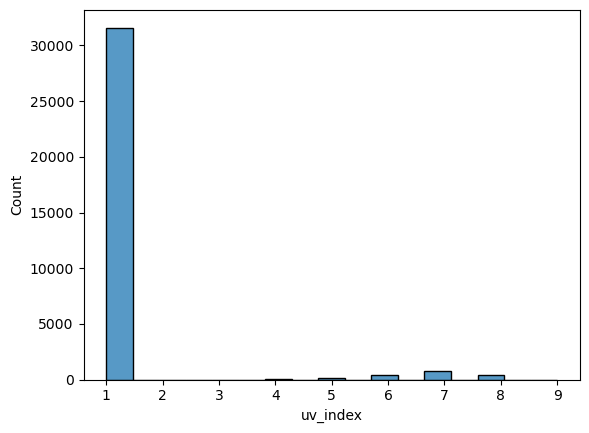

In [15]:
sns.histplot(weather['uv_index']);

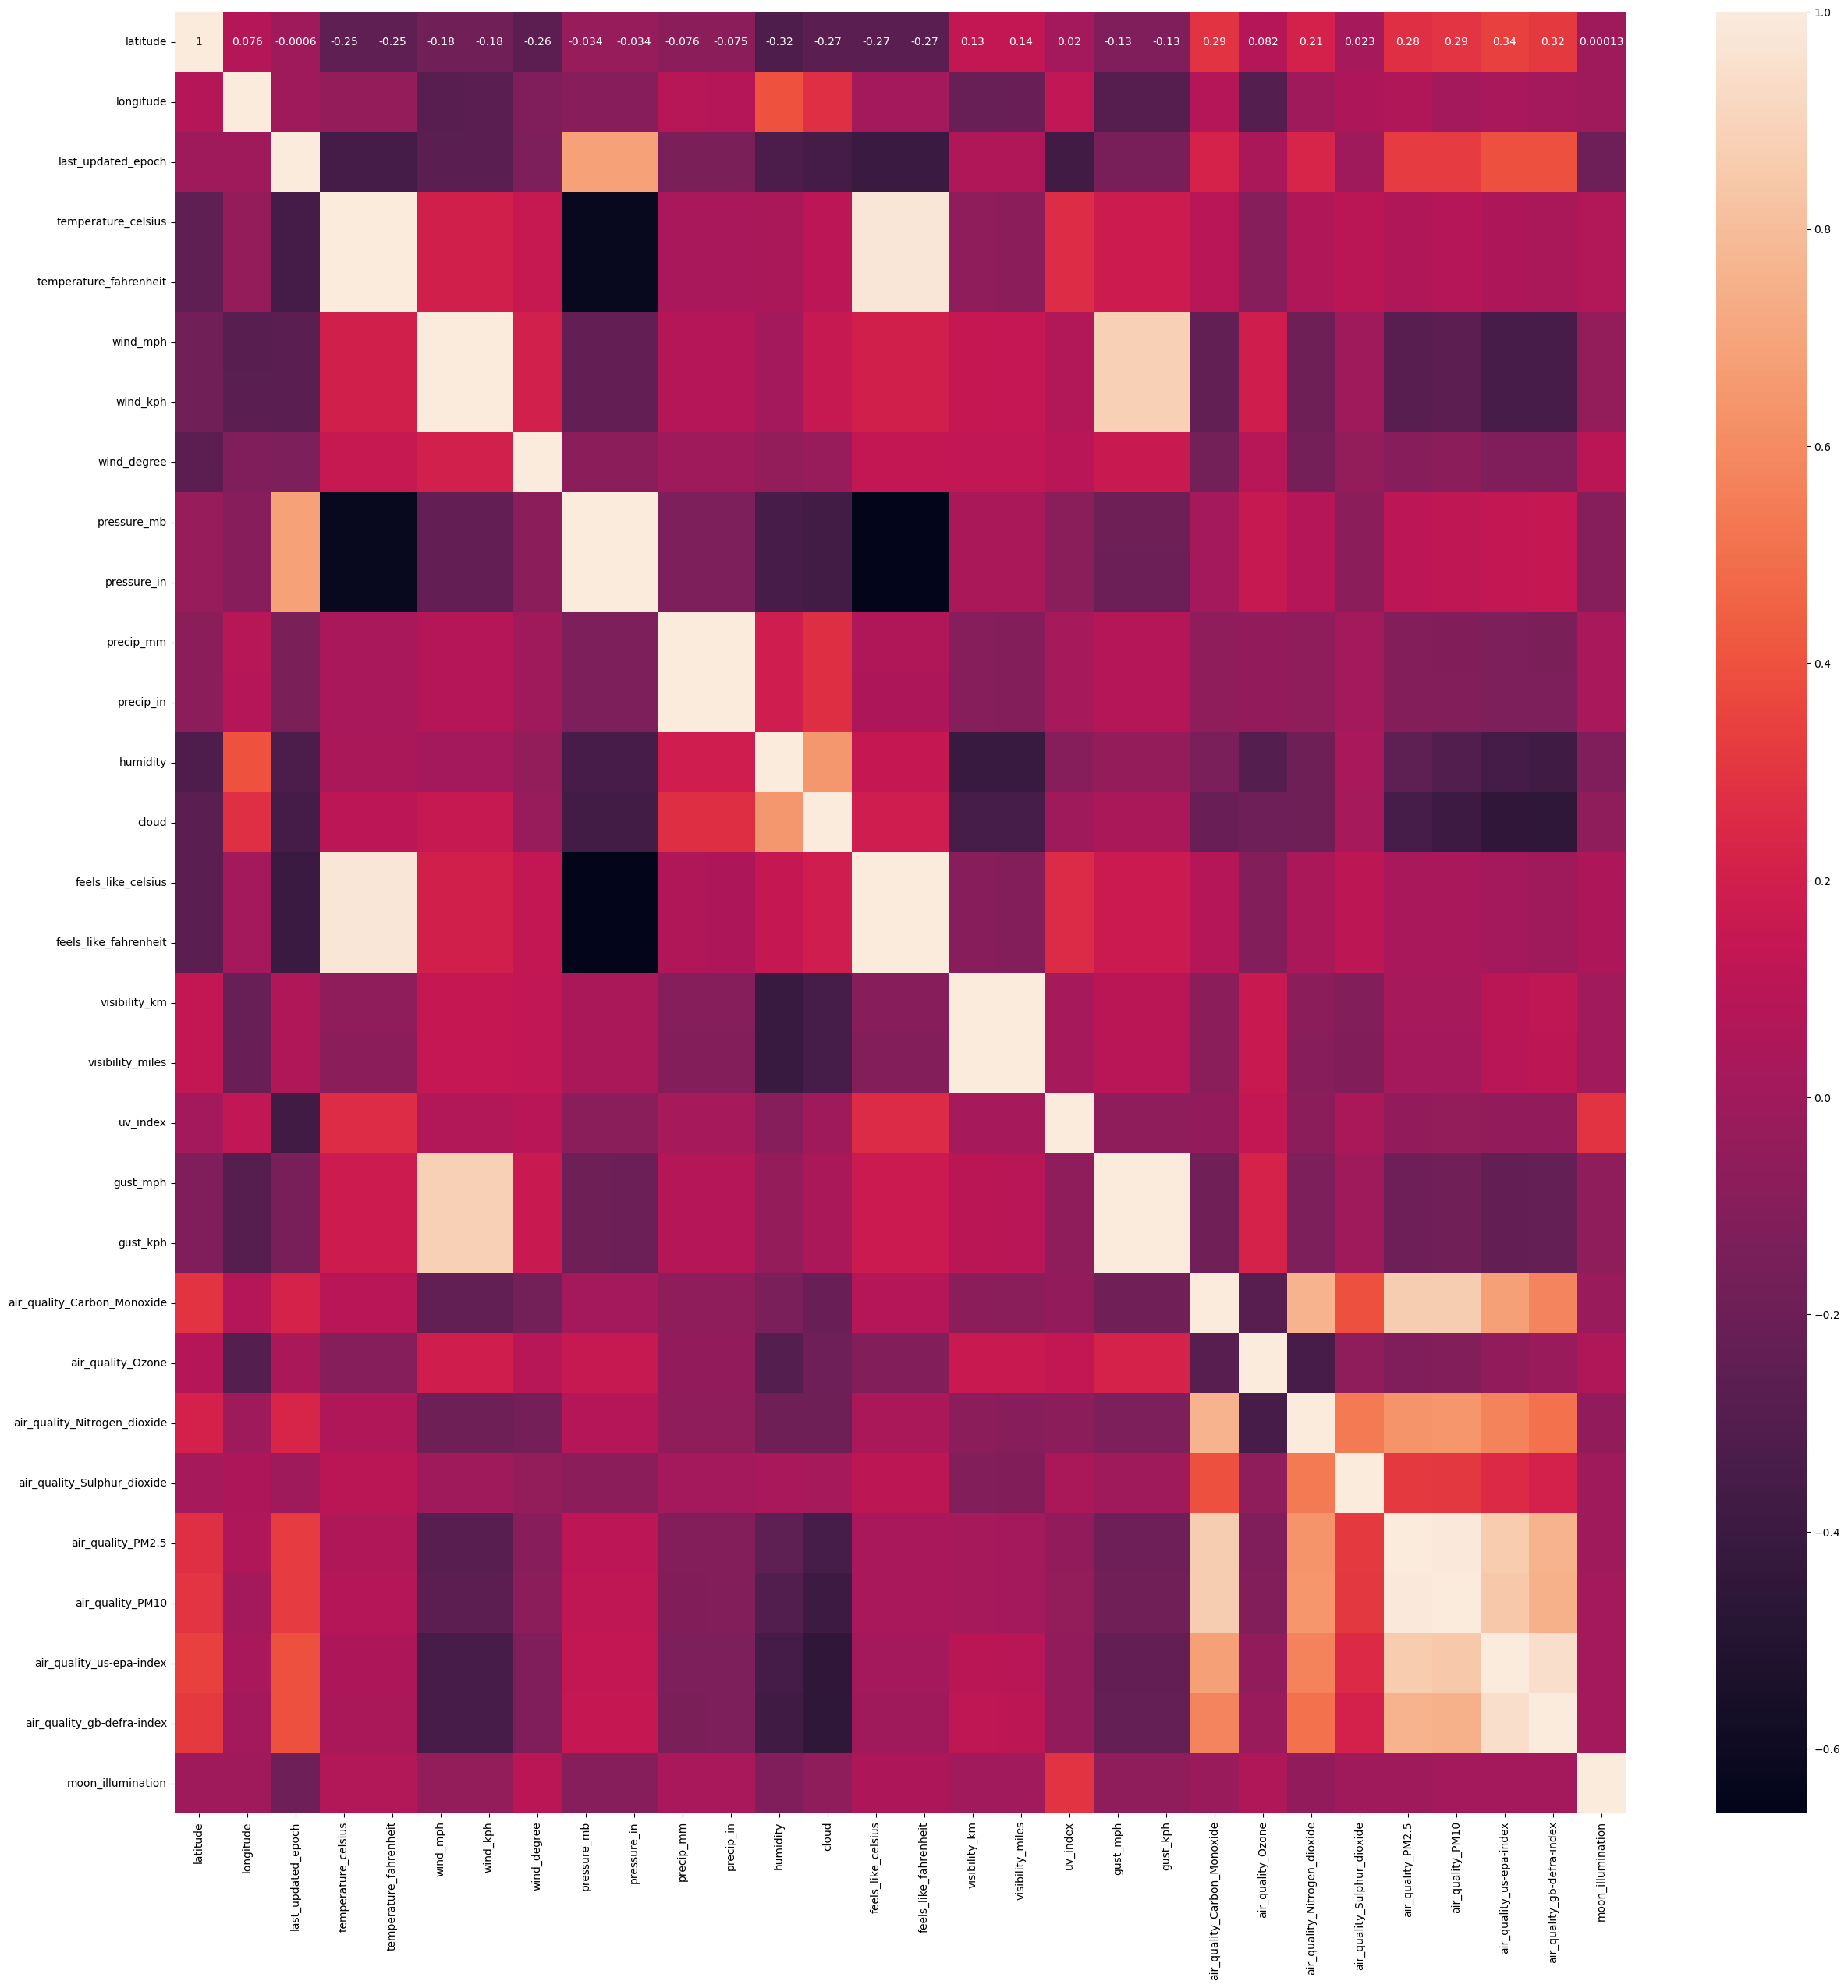

In [20]:
weather_corr = weather.select_dtypes(include='number')
corr_data  = weather_corr.corr()
plt.figure(figsize = (30,30))
sns.heatmap(corr_data, annot = True);

ValueError: keyword grid_b is not recognized; valid keywords are ['size', 'width', 'color', 'tickdir', 'pad', 'labelsize', 'labelcolor', 'labelfontfamily', 'zorder', 'gridOn', 'tick1On', 'tick2On', 'label1On', 'label2On', 'length', 'direction', 'left', 'bottom', 'right', 'top', 'labelleft', 'labelbottom', 'labelright', 'labeltop', 'labelrotation', 'grid_agg_filter', 'grid_alpha', 'grid_animated', 'grid_antialiased', 'grid_clip_box', 'grid_clip_on', 'grid_clip_path', 'grid_color', 'grid_dash_capstyle', 'grid_dash_joinstyle', 'grid_dashes', 'grid_data', 'grid_drawstyle', 'grid_figure', 'grid_fillstyle', 'grid_gapcolor', 'grid_gid', 'grid_in_layout', 'grid_label', 'grid_linestyle', 'grid_linewidth', 'grid_marker', 'grid_markeredgecolor', 'grid_markeredgewidth', 'grid_markerfacecolor', 'grid_markerfacecoloralt', 'grid_markersize', 'grid_markevery', 'grid_mouseover', 'grid_path_effects', 'grid_picker', 'grid_pickradius', 'grid_rasterized', 'grid_sketch_params', 'grid_snap', 'grid_solid_capstyle', 'grid_solid_joinstyle', 'grid_transform', 'grid_url', 'grid_visible', 'grid_xdata', 'grid_ydata', 'grid_zorder', 'grid_aa', 'grid_c', 'grid_ds', 'grid_ls', 'grid_lw', 'grid_mec', 'grid_mew', 'grid_mfc', 'grid_mfcalt', 'grid_ms']

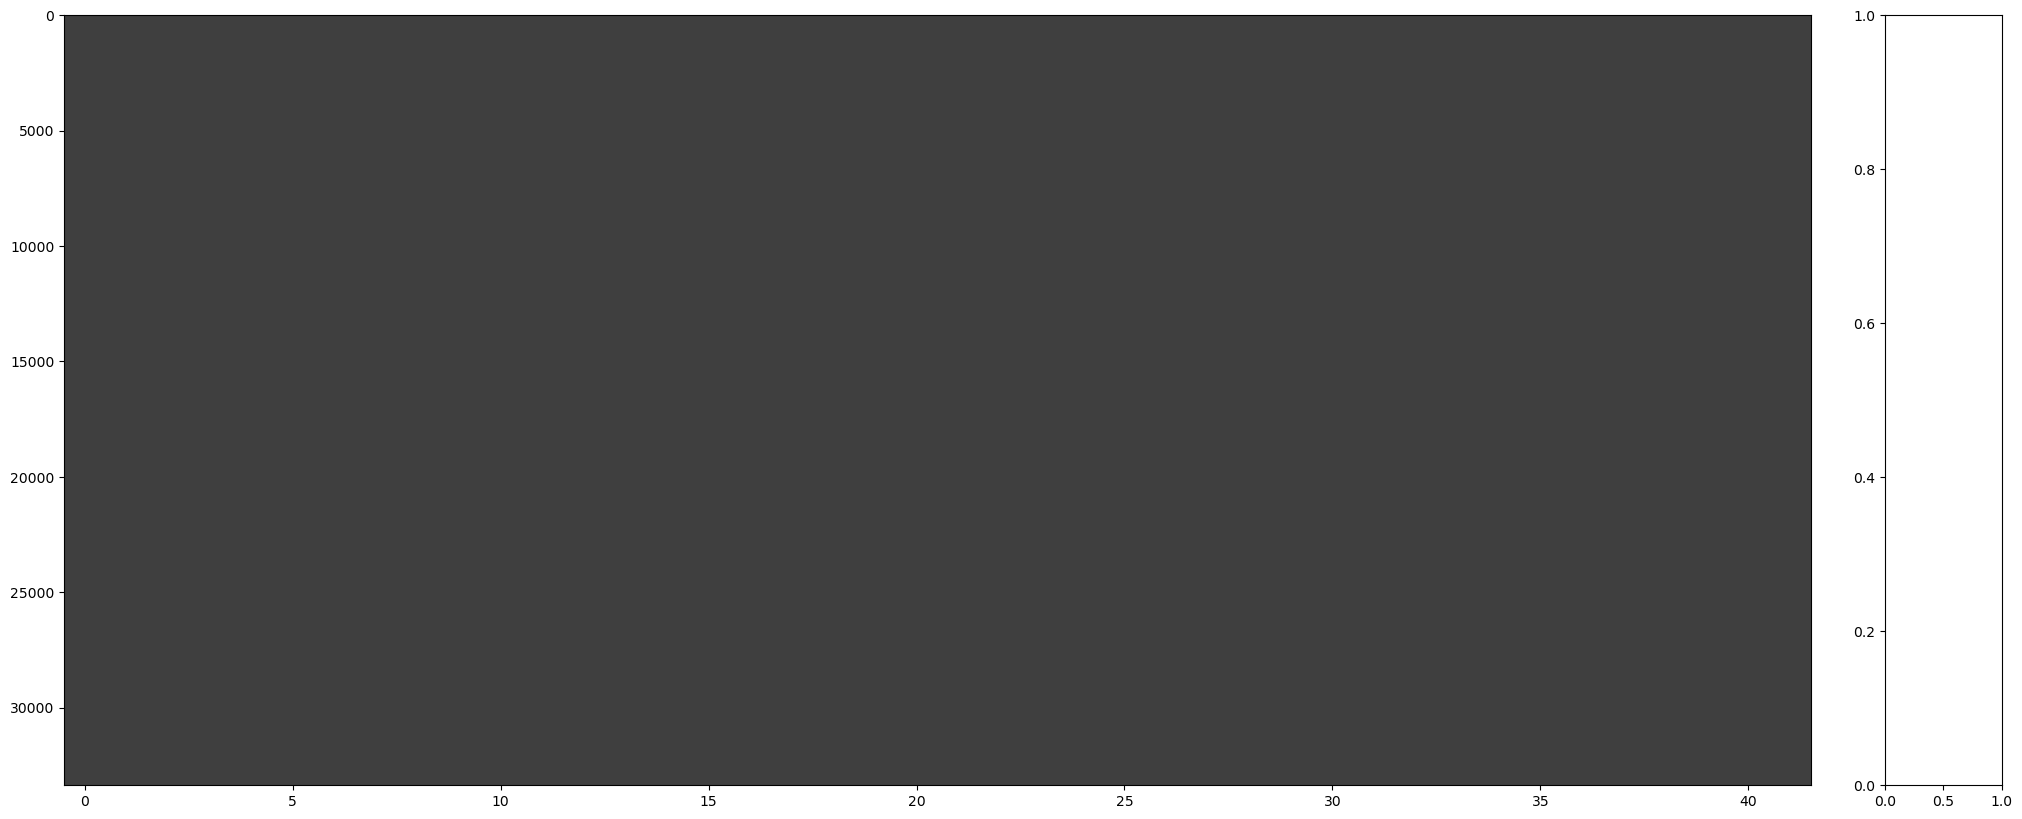

In [21]:
msno.matrix(weather)